In [1]:
# 导入库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 机器学习模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# 加载数据
data = pd.read_csv("heart2.csv")

# 编码类别变量
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# 分离特征和标签
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

print(data)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0    

In [3]:
# 初始化分类器
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# 训练和评估每个分类器
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # 训练模型
    y_pred = clf.predict(X_test)  # 预测
    accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"]))
    print("="*60)

Random Forest Accuracy: 0.88
Classification Report for Random Forest:
                   precision    recall  f1-score   support

No Heart Disease       0.85      0.86      0.85        77
   Heart Disease       0.90      0.89      0.89       107

        accuracy                           0.88       184
       macro avg       0.87      0.87      0.87       184
    weighted avg       0.88      0.88      0.88       184

Logistic Regression Accuracy: 0.85
Classification Report for Logistic Regression:
                   precision    recall  f1-score   support

No Heart Disease       0.80      0.87      0.83        77
   Heart Disease       0.90      0.84      0.87       107

        accuracy                           0.85       184
       macro avg       0.85      0.86      0.85       184
    weighted avg       0.86      0.85      0.85       184

Support Vector Machine Accuracy: 0.85
Classification Report for Support Vector Machine:
                   precision    recall  f1-score   suppo

Test Accuracy: 0.84
Classification Report:
                   precision    recall  f1-score   support

No Heart Disease       0.82      0.81      0.81        77
   Heart Disease       0.86      0.87      0.87       107

        accuracy                           0.84       184
       macro avg       0.84      0.84      0.84       184
    weighted avg       0.84      0.84      0.84       184



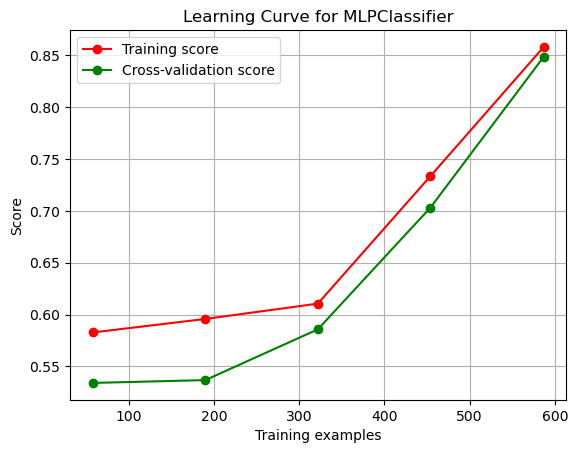

In [4]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier


# 7. 定义 MLPClassifier 模型
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation="relu", solver="adam", alpha=0.001, max_iter=1000, random_state=42, early_stopping=True)

# 8. 训练模型并评估
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"]))

# 9. 定义学习曲线绘制函数
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        n_jobs=1,
        scoring='accuracy'
    )

    # 计算训练和验证分数的平均值
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    # 绘制学习曲线
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve for MLPClassifier")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# 10. 绘制学习曲线
plot_learning_curve(mlp, X_train, y_train, cv=5)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

/Users/niukeli/anaconda3/envs/ST/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/niukeli/anaconda3/envs/ST/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/niukeli/anaconda3/envs/ST/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/niukeli/anaconda3/envs/ST/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

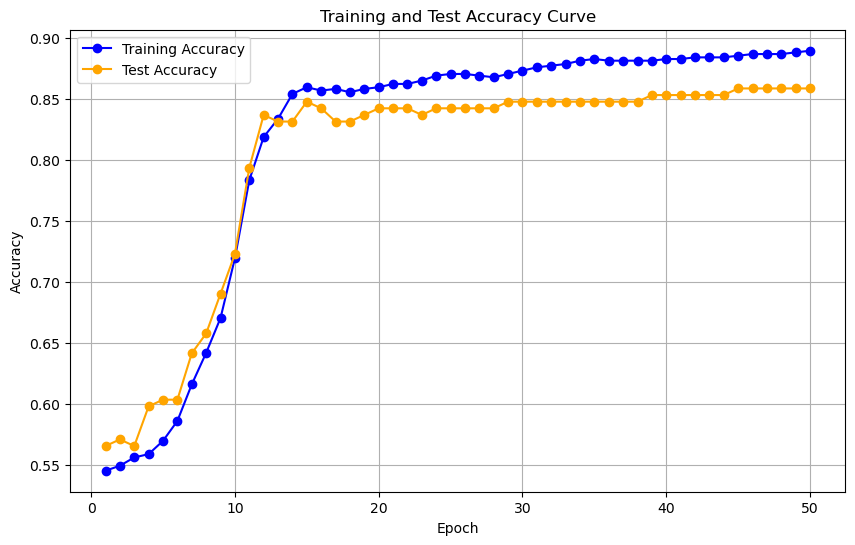

In [33]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. 加载数据集
data = pd.read_csv("heart2.csv")

# 2. 查看数据的基本信息，确保加载正确
print(data.head())
print(data.info())

# 3. 编码类别变量，将类别变量转换为数值型
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# 4. 分离特征和标签
X = data.drop("HeartDisease", axis=1)  # 假设 "HeartDisease" 列为标签，1=有心脏病，0=无心脏病
y = data["HeartDisease"]

# 5. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 标准化数值特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. 定义 MLPClassifier 模型
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation="relu", solver="adam", alpha=0.001, max_iter=1000, random_state=42, early_stopping=False)

# 8. 绘制训练和测试准确率曲线
def plot_accuracy_curve(model, X_train, y_train, X_test, y_test, epochs=50):
    train_scores = []
    test_scores = []

    for epoch in range(epochs):
        # 限制迭代次数
        model.max_iter = epoch + 1
        model.fit(X_train, y_train)  # 每次重新拟合模型
        train_scores.append(model.score(X_train, y_train))  # 计算训练集准确率
        test_scores.append(model.score(X_test, y_test))  # 计算测试集准确率

    # 绘制训练集和测试集准确率
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_scores, label="Training Accuracy", marker="o", color="blue")
    plt.plot(range(1, epochs + 1), test_scores, label="Test Accuracy", marker="o", color="orange")
    plt.title("Training and Test Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# 调用绘制函数
plot_accuracy_curve(mlp, X_train, y_train, X_test, y_test, epochs=50)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
tf.random.set_seed(42)

early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)


alpha=l2(0.01)
# 构建 MLP 模型
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation="relu", kernel_regularizer=alpha),
    Dropout(0.3),
    Dense(1, activation="sigmoid", kernel_regularizer=alpha)
])

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# 在测试集上评估模型
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
#y_pred_nn=model.predict(X_test).astype("int32")
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network (MLP) Accuracy: {accuracy_nn:.2f}")
print("Classification Report for Neural Network (MLP):\n", classification_report(y_test, y_pred_nn, target_names=["No Heart Disease", "Heart Disease"]))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Neural Network (MLP) Accuracy: 0.58


ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

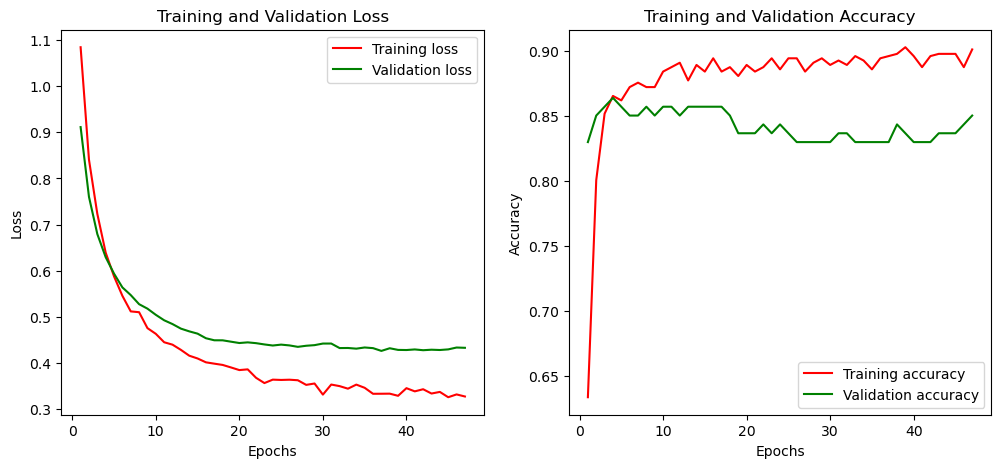

In [24]:
import matplotlib.pyplot as plt

# 绘制学习曲线函数
def plot_learning_curves(history):
    # 获取训练和验证的损失
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)
    
    # 绘制损失曲线
    plt.figure(figsize=(12, 5))
    
    # 损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'r-', label="Training loss")
    plt.plot(epochs, val_loss, 'g-', label="Validation loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # 准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r-', label="Training accuracy")
    plt.plot(epochs, val_accuracy, 'g-', label="Validation accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    plt.show()

# 调用绘制函数
plot_learning_curves(history)


Epoch [10/50], Train Loss: 0.6386, Test Loss: 0.6377
Epoch [20/50], Train Loss: 0.5905, Test Loss: 0.5845
Epoch [30/50], Train Loss: 0.5161, Test Loss: 0.5207
Epoch [40/50], Train Loss: 0.4470, Test Loss: 0.4548
Epoch [50/50], Train Loss: 0.3855, Test Loss: 0.4029


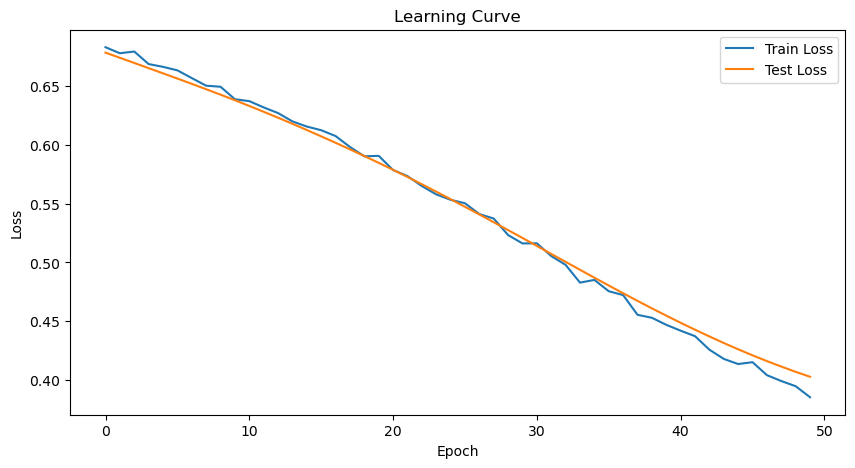

Neural Network (Custom MLP) Accuracy: 0.85
Classification Report for Neural Network (Custom MLP):
                   precision    recall  f1-score   support

No Heart Disease       0.78      0.88      0.83        77
   Heart Disease       0.91      0.82      0.86       107

        accuracy                           0.85       184
       macro avg       0.84      0.85      0.85       184
    weighted avg       0.85      0.85      0.85       184



In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# 设置随机种子，确保实验结果的可重复性
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# 超参数设置
alpha = 0.01  # L2 正则化强度
dropout_rate = 0.3  # Dropout 概率
learning_rate = 0.001  # 学习率
hidden_units_1 = 64  # 第一隐藏层神经元数量
hidden_units_2 = 32  # 第二隐藏层神经元数量
epochs = 50
batch_size = 16

# 构建自定义神经网络类
class CustomMLP(nn.Module):
    def __init__(self, input_size):
        super(CustomMLP, self).__init__()
        # 定义层结构
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, hidden_units_1),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_units_1, hidden_units_2),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.output_layer = nn.Linear(hidden_units_2, 1)

    # 前向传播（forward pass）
    def forward(self, x):
        # 第一隐藏层前向传播
        forward_pass_1 = self.layer1(x)
        
        # 第二隐藏层前向传播
        forward_pass_2 = self.layer2(forward_pass_1)
        
        # 输出层前向传播
        output = torch.sigmoid(self.output_layer(forward_pass_2))  # 将输出限制在 [0,1]
        return output

# 初始化模型
input_size = X_train.shape[1]
model = CustomMLP(input_size)

# 损失函数和优化器
criterion = nn.BCELoss()  # 二分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=alpha)  # 使用 Adam 优化器

# 将数据转换为 PyTorch 的 Tensor 格式
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 存储训练和验证损失
train_losses = []
test_losses = []

# 训练模型
for epoch in range(epochs):
    model.train()  # 训练模式
    optimizer.zero_grad()  # 清除梯度

    # 前向传播
    outputs = model(X_train_tensor)
    
    # 计算训练损失
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())
    
    # 反向传播（backward pass）和梯度下降（gradient descent）
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 梯度下降，更新模型参数

    # 计算验证损失
    model.eval()  # 评估模式
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # 打印损失
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# 绘制学习曲线
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# 在测试集上评估模型
model.eval()  # 测试模式
with torch.no_grad():
    y_pred_nn = (model(X_test_tensor) > 0.5).int()  # 将概率转换为二进制标签

accuracy_nn = accuracy_score(y_test, y_pred_nn.numpy())
print(f"Neural Network (Custom MLP) Accuracy: {accuracy_nn:.2f}")
print("Classification Report for Neural Network (Custom MLP):\n", classification_report(y_test, y_pred_nn.numpy(), target_names=["No Heart Disease", "Heart Disease"]))


NameError: name 'history' is not defined

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 设置随机种子，确保实验结果的可重复性
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# 超参数设置
alpha = 0.01  # L2 正则化强度
dropout_rate = 0.3  # Dropout 概率
learning_rate = 0.001  # 学习率
hidden_units_1 = 64  # 第一隐藏层神经元数量
hidden_units_2 = 32  # 第二隐藏层神经元数量
epochs = 50
batch_size = 16

# 构建自定义神经网络类
class CustomMLP(nn.Module):
    def __init__(self, input_size):
        super(CustomMLP, self).__init__()
        # 定义层结构
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, hidden_units_1),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_units_1, hidden_units_2),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.output_layer = nn.Linear(hidden_units_2, 1)

    def forward(self, x):
        output = torch.sigmoid(self.output_layer(self.layer2(self.layer1(x))))
        return output

# 初始化模型
input_size = X_train.shape[1]
criterion = nn.BCELoss()
train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]
train_scores = []
test_scores = []

for train_size in train_sizes:
    # 重新划分训练数据
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    X_train_tensor = torch.tensor(X_train_sub, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_sub.values, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
    
    # 初始化模型
    model = CustomMLP(input_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=alpha)

    # 训练模型
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # 评估训练集准确率
    model.eval()
    with torch.no_grad():
        train_pred = (model(X_train_tensor) > 0.5).int()
        train_accuracy = accuracy_score(y_train_sub, train_pred.numpy())
        train_scores.append(train_accuracy)

        # 评估测试集准确率
        test_pred = (model(X_test_tensor) > 0.5).int()
        test_accuracy = accuracy_score(y_test, test_pred.numpy())
        test_scores.append(test_accuracy)

# 绘制学习曲线
plt.figure(figsize=(10, 5))
plt.plot([int(len(X_train) * size) for size in train_sizes], train_scores, label="Train Accuracy")
plt.plot([int(len(X_train) * size) for size in train_sizes], test_scores, label="Test Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Effect of Training Set Size on Model Accuracy")
plt.legend()
plt.grid()
plt.show()


InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 1.0 instead.

Early stopping at epoch 34
Train Accuracy: 0.5463
Test Accuracy: 0.5815


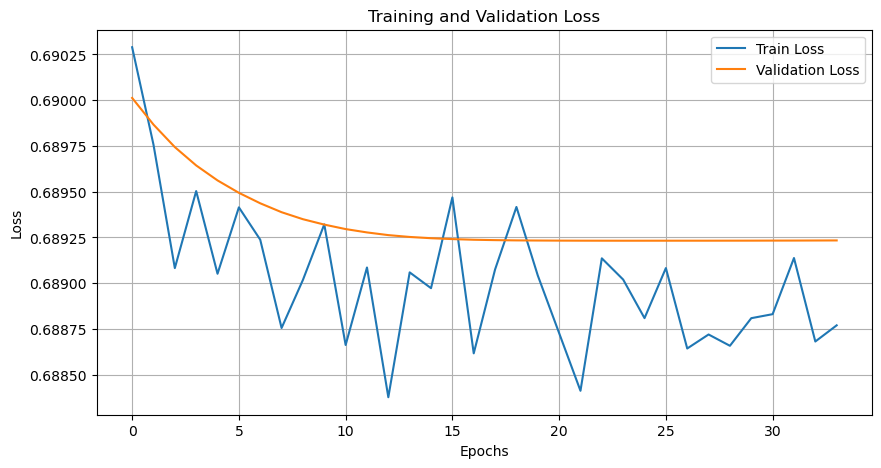

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# Hyperparameter configuration
hyperparams = {
    'alpha': 0.01,  # L2 regularization strength
    'dropout_rate': 0.3,  # Dropout probability
    'learning_rate': 0.001,  # Learning rate
    'hidden_layers': [128]*10,  # Hidden layer units
    'epochs': 200,
    'batch_size': 16,
    'activation_function': nn.ReLU,  # Activation function
    'loss_function': nn.BCELoss(),  # Loss function
    'early_stopping': True,  # Whether to use early stopping
    'patience': 10  # Early stopping patience
}

# Custom MLP class with dynamic hidden layers
class CustomMLP(nn.Module):
    def __init__(self, input_size, hidden_layers, dropout_rate, activation_function):
        super(CustomMLP, self).__init__()
        layers = []
        in_features = input_size

        # Adding hidden layers dynamically
        for units in hidden_layers:
            layers.append(nn.Linear(in_features, units))
            layers.append(activation_function())
            layers.append(nn.Dropout(dropout_rate))
            in_features = units

        # Output layer
        layers.append(nn.Linear(in_features, 1))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return torch.sigmoid(self.network(x))

# Function to train the model
def train_model(model, optimizer, criterion, X_train, y_train, X_val, y_val, epochs, patience):
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience and hyperparams['early_stopping']:
            print(f"Early stopping at epoch {epoch+1}")
            break

    return train_losses, val_losses

# Prepare data (replace X_train, X_test, y_train, y_test with your data)
input_size = X_train.shape[1]
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Split training set into training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_tensor, y_train_tensor, test_size=0.2, random_state=seed)

# Initialize model
model = CustomMLP(input_size=input_size,
                  hidden_layers=hyperparams['hidden_layers'],
                  dropout_rate=hyperparams['dropout_rate'],
                  activation_function=hyperparams['activation_function'])

# Initialize optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=hyperparams['learning_rate'], weight_decay=hyperparams['alpha'])
criterion = hyperparams['loss_function']

# Train the model
train_losses, val_losses = train_model(model, optimizer, criterion, X_train_sub, y_train_sub, X_val, y_val, hyperparams['epochs'], hyperparams['patience'])

# Evaluate the model
model.eval()
with torch.no_grad():
    train_pred = (model(X_train_tensor) > 0.5).int()
    train_accuracy = accuracy_score(y_train, train_pred.numpy())
    test_pred = (model(X_test_tensor) > 0.5).int()
    test_accuracy = accuracy_score(y_test, test_pred.numpy())

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [14]:
# Train and evaluate an SVM model
from sklearn.svm import SVC

# Convert tensors to numpy arrays for SVM
X_train_np = X_train
X_test_np = X_test
y_train_np = y_train.values

# Split training set into training and validation sets for SVM
X_train_sub_np, X_val_np, y_train_sub_np, y_val_np = train_test_split(X_train_np, y_train_np, test_size=0.2, random_state=seed)

# Initialize and train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=seed)
svm_model.fit(X_train_sub_np, y_train_sub_np)

# Evaluate the SVM model
train_accuracy_svm = accuracy_score(y_train_sub_np, svm_model.predict(X_train_sub_np))
val_accuracy_svm = accuracy_score(y_val_np, svm_model.predict(X_val_np))
test_accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test_np))

print(f"SVM Train Accuracy: {train_accuracy_svm:.4f}")
print(f"SVM Validation Accuracy: {val_accuracy_svm:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm:.4f}")

SVM Train Accuracy: 0.9029
SVM Validation Accuracy: 0.9184
SVM Test Accuracy: 0.8750


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 数据加载
data = pd.read_csv('heart2.csv')

print("\n数据类型：")
print(data.dtypes)

# 1. 去除缺失值
# 如果数据中有 NA 值，直接删除
data = data.dropna()

# 2. 热独编码
# 将分类变量 'Sex' 转换为两个独立列 'Male' 和 'Female'
# 对其他分类变量（如 ChestPainType, RestingECG, ExerciseAngina, ST_Slope）进行热独编码
categorical_cols = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(data, columns=categorical_cols)

# 3. 打印处理后数据的前几行和数据类型
print("数据的前几行：")
print(data.head())
# 打印数据总量和特征数量
print("\n数据总量（行数）：", data.shape[0])
print("特征数量（列数）：", data.shape[1])


# 4. 提取特征和标签
# 将 'HeartDisease' 作为标签，其余列为特征
X = data.drop(columns=['HeartDisease']).values
y = data['HeartDisease'].values

# 5. 数据标准化
# 标准化的目的：将所有特征的值调整为均值为 0，方差为 1 的标准正态分布，便于模型训练时权重的稳定更新。
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 打印标准化后的一些特征
print("\n标准化后的数据（前5行）：")
print(X[:5])

# 6. 数据集分割
# 按 80% 训练集和 20% 测试集分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 转换为 PyTorch 的 tensor 格式
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 打印 tensor 的形状以检查
print("\n训练集特征张量形状：", X_train_tensor.shape)
print("训练集标签张量形状：", y_train_tensor.shape)
print("测试集特征张量形状：", X_test_tensor.shape)
print("测试集标签张量形状：", y_test_tensor.shape)



数据类型：
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
数据的前几行：
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...         

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义神经网络模型
class HeartDiseaseANN(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseANN, self).__init__()
        # 输入层到第一个隐藏层
        self.fc1 = nn.Linear(input_size, 64)  # 第一层有64个神经元
        self.relu1 = nn.ReLU()
        
        # 第一个隐藏层到第二个隐藏层
        self.fc2 = nn.Linear(64, 32)  # 第二层有32个神经元
        self.relu2 = nn.ReLU()
        
        # 第二个隐藏层到输出层
        self.fc3 = nn.Linear(32, 2)  # 二分类任务，输出2个神经元
        self.softmax = nn.Softmax(dim=1)  # 对输出进行归一化

    def forward(self, x):
        # 前向传播
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# 确定输入特征的数量（根据数据预处理后确定）
input_size = 11  # 假设数据集中有11个特征
model = HeartDiseaseANN(input_size)

# 打印模型结构
print("神经网络结构：")
print(model)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熵损失用于分类任务
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器，学习率为0.001


In [ ]:
# 神经网络模型定义
class HeartDiseaseModel(torch.nn.Module):
    def __init__(self):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = torch.nn.Linear(X.shape[1], 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 2)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 模型实例化
model = HeartDiseaseModel()

# 损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 模型训练
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# 模型评估
def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(preds.numpy())
    acc = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {acc:.4f}")

# 运行训练和评估
train_model(model, train_loader, criterion, optimizer, epochs=20)
evaluate_model(model, test_loader)

In [20]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 读取数据
data = pd.read_csv('heart2.csv')

# 检查缺失值
# print(data.isnull().sum())



# 加载数据
data = pd.read_csv("heart2.csv")

# 编码类别变量
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# 分离特征和标签
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

print(data)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        

In [15]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 读取数据
data = pd.read_csv('heart2.csv')

# 检查缺失值
print(data.isnull().sum())

# 特征编码
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# 数据分割
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# 标准化数值特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 数据集划分为训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 转换为 PyTorch 张量
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.long)

# 创建 PyTorch 数据加载器
train_loader = DataLoader(dataset=list(zip(X_train, y_train)), batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=list(zip(X_val, y_val)), batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=list(zip(X_test, y_test)), batch_size=32, shuffle=False)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [16]:
import torch.nn as nn
import torch.nn.functional as F

class HeartDiseaseANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(HeartDiseaseANN, self).__init__()
        # 定义网络结构
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.dropout = nn.Dropout(0.2)  # 防止过拟合

    def forward(self, x):
        x = F.relu(self.fc1(x))  # 第一隐藏层
        x = self.dropout(x)
        x = F.relu(self.fc2(x))  # 第二隐藏层
        x = self.fc3(x)  # 输出层（没有激活，交叉熵损失函数会自动处理 softmax）
        return x

# 初始化模型
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = 2
model = HeartDiseaseANN(input_size, hidden_size1, hidden_size2, output_size)
print(model)


HeartDiseaseANN(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [17]:
import torch.optim as optim

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [18]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50, early_stopping_patience=5):
    best_val_loss = float('inf')
    patience = 0
    
    for epoch in range(epochs):
        # 训练模式
        model.train()
        train_loss = 0.0
        
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # 验证模式
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        
        # 平均损失
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        # 早停
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience += 1
            if patience >= early_stopping_patience:
                print("Early stopping triggered.")
                break

train_model(model, train_loader, val_loader, criterion, optimizer)


Epoch 1/50, Train Loss: 0.6210, Val Loss: 0.5451
Epoch 2/50, Train Loss: 0.5051, Val Loss: 0.4257
Epoch 3/50, Train Loss: 0.4493, Val Loss: 0.3606
Epoch 4/50, Train Loss: 0.3728, Val Loss: 0.3457
Epoch 5/50, Train Loss: 0.3716, Val Loss: 0.3360
Epoch 6/50, Train Loss: 0.3615, Val Loss: 0.3285
Epoch 7/50, Train Loss: 0.3424, Val Loss: 0.3173
Epoch 8/50, Train Loss: 0.3332, Val Loss: 0.3135
Epoch 9/50, Train Loss: 0.3325, Val Loss: 0.3145
Epoch 10/50, Train Loss: 0.3249, Val Loss: 0.3144
Epoch 11/50, Train Loss: 0.3238, Val Loss: 0.3109
Epoch 12/50, Train Loss: 0.3177, Val Loss: 0.3077
Epoch 13/50, Train Loss: 0.3308, Val Loss: 0.3050
Epoch 14/50, Train Loss: 0.3144, Val Loss: 0.3055
Epoch 15/50, Train Loss: 0.3035, Val Loss: 0.2999
Epoch 16/50, Train Loss: 0.3093, Val Loss: 0.2976
Epoch 17/50, Train Loss: 0.3470, Val Loss: 0.2958
Epoch 18/50, Train Loss: 0.2925, Val Loss: 0.2931
Epoch 19/50, Train Loss: 0.3559, Val Loss: 0.2964
Epoch 20/50, Train Loss: 0.3108, Val Loss: 0.2986
Epoch 21/

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# 加载最佳模型
model.load_state_dict(torch.load('best_model.pth'))

# 测试模型
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(y_batch.numpy())

# 评估
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Heart Disease']))


Confusion Matrix:
[[54  8]
 [11 65]]

Classification Report:
               precision    recall  f1-score   support

       Normal       0.83      0.87      0.85        62
Heart Disease       0.89      0.86      0.87        76

     accuracy                           0.86       138
    macro avg       0.86      0.86      0.86       138
 weighted avg       0.86      0.86      0.86       138

